In [1]:
#Import Libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data set
df = pd.read_csv('Preprocessed_data.csv')

In [3]:
#Prepare X and Y data set
x_data = df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Features

y_data = df['pets_allowed'] # Labels


#Splitting the data set into Train set & Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.25, random_state = 1)


In [4]:
#Make the Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,y_train)

ypred=knn_clf.predict(X_test) #These are the predicted output values

In [5]:
#the scaler model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting and standardization

train_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)

In [6]:
#to store rmse values for different k
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = []
#try running from k=1 through 20 and record testing accuracy
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred=model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.37259402328851565
RMSE value for k =  2 is : 0.3449328200670436
RMSE value for k =  3 is : 0.33842033793500975
RMSE value for k =  4 is : 0.3363637593762892
RMSE value for k =  5 is : 0.3368041594239042
RMSE value for k =  6 is : 0.3375930306532162
RMSE value for k =  7 is : 0.3392364545633083
RMSE value for k =  8 is : 0.3405743461815249
RMSE value for k =  9 is : 0.3417889887365777
RMSE value for k =  10 is : 0.34284831943457506
RMSE value for k =  11 is : 0.34438529744086843
RMSE value for k =  12 is : 0.34617578251581077
RMSE value for k =  13 is : 0.34742981675318924
RMSE value for k =  14 is : 0.3486493950886355
RMSE value for k =  15 is : 0.34979372851592055
RMSE value for k =  16 is : 0.35088559820433574
RMSE value for k =  17 is : 0.35212982423844735
RMSE value for k =  18 is : 0.3532475481986995
RMSE value for k =  19 is : 0.3543692931936532
RMSE value for k =  20 is : 0.35526184036179764


In [7]:
#Traiing
#Create KNN Classifier: k=0.314
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

#Prediction
y_pred = classifier.predict(X_test)

In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 85.02664234881809


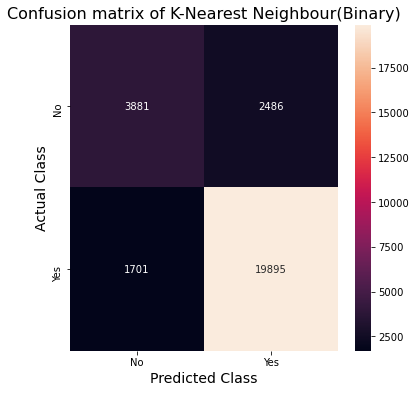

In [9]:
#confusion matrix creation
from sklearn.metrics import  confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

#Plot the Confusion Matrix
LABELS=['No','Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of K-Nearest Neighbour(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [10]:
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])
Actual = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Pet Allowed','Pet Not Allowed')), 
categories = ['Pet Allowed','Pet Not Allowed'])

pd.crosstab(Actual, Predicted, 
            rownames=['Predicted Class'], 
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Pet Allowed,Pet Not Allowed,Total Amount
Predicted Class,,,
Pet Allowed,19895,2486,22381
Pet Not Allowed,1701,3881,5582
Total Amount,21596,6367,27963
